# Machine Learning Final Exam -  Logistic Regression

### Baseline Model

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, precision_recall_fscore_support
from sklearn.model_selection import cross_val_predict


In [ ]:
df_train = pd.read_csv("Habitable_Train_Balanced.csv")
df_full = pd.read_csv("Habitable_Full_Balanced.csv")
df_test = pd.read_csv("Habitable_Test.csv")
df_val = pd.read_csv("Habitable_Val.csv")


In [ ]:
print(f"Value counts for df_full:\n{df_full['Habitable'].value_counts()}\n")
print(f"Value counts for df_train:\n{df_train['Habitable'].value_counts()}\n")
print(f"Value counts for df_test:\n{df_test['Habitable'].value_counts()}\n")
print(f"Value counts for df_val:\n{df_val['Habitable'].value_counts()}\n")

Value counts for df_full:
0    5145
1    1544
Name: Habitable, dtype: int64

Value counts for df_train:
0    3608
1    1082
Name: Habitable, dtype: int64

Value counts for df_test:
0    770
1     12
Name: Habitable, dtype: int64

Value counts for df_val:
0    767
1     14
Name: Habitable, dtype: int64



**Preparation:**

Four files were imported. A training file that was already balanced in advance with synthetic data by SMOTE and a test and validation file, both of which contain the original, unbalanced data so as not to generate bias. In addition, an entire file containing balanced data using SMOTE was imported, which is used to perform cross validation.

In [ ]:
np.random.seed(0)

In [ ]:
from sklearn.linear_model import LogisticRegression

### Scale the datasets

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


C:\Users\Elfur Örlygsdóttir\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


### Define features and target

In [ ]:
# Define features (X) and target (y)
X_train = df_train.drop(columns=['Habitable'])
y_train = df_train['Habitable']


X_test = df_test.drop(columns=['Habitable'])
y_test = df_test['Habitable']

X_val = df_val.drop(columns=['Habitable'])
y_val = df_val['Habitable']

### Default Model

In [ ]:
model_default = LogisticRegression()
model_default.fit(X_train, y_train)

C:\Users\Elfur Örlygsdóttir\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Classification report for training set

In [ ]:
# Print classification report for training set
y_train_pred = model_default.predict(X_train)
print("Training set classification report:")
print(classification_report(y_train, y_train_pred))

Training set classification report:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      3608
           1       0.74      0.71      0.72      1082

    accuracy                           0.87      4690
   macro avg       0.83      0.82      0.82      4690
weighted avg       0.87      0.87      0.87      4690



### Classification report for validation set

In [ ]:
# Print classification report for validation set
y_val_pred = model_default.predict(X_val)
print("Validation set classification report:")
print(classification_report(y_val, y_val_pred))

Validation set classification report:
              precision    recall  f1-score   support

           0       0.99      0.92      0.95       767
           1       0.11      0.57      0.19        14

    accuracy                           0.91       781
   macro avg       0.55      0.75      0.57       781
weighted avg       0.98      0.91      0.94       781



### Clssification report for test set

In [ ]:
# Print classification report for test set
y_test_pred = model_default.predict(X_test)
print("Test set classification report:")
print(classification_report(y_test, y_test_pred))


Test set classification report:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96       770
           1       0.12      0.67      0.21        12

    accuracy                           0.92       782
   macro avg       0.56      0.80      0.58       782
weighted avg       0.98      0.92      0.95       782



In [ ]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
import numpy as np

# Prepare the data
X_full = df_full.drop(columns=['Habitable'])
y_full = df_full['Habitable']

# Scale the features
scaler = StandardScaler()
X_full_scaled = scaler.fit_transform(X_full)

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000)

kf = KFold(n_splits=5)

# Store evaluation metrics for each fold
fold_accuracies = []
fold_precisions = []
fold_recalls = []
fold_f1_scores = []

for fold, (train_index, test_index) in enumerate(kf.split(X_full_scaled), 1):
    X_train = X_full_scaled[train_index]
    y_train = y_full.iloc[train_index].values
    X_test = X_full_scaled[test_index]
    y_test = y_full.iloc[test_index].values

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Append metrics to respective lists
    fold_accuracies.append(accuracy)
    fold_precisions.append(precision)
    fold_recalls.append(recall)
    fold_f1_scores.append(f1)

    print(f'For fold {fold}:')
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}')
    print()

# Mean evaluation metrics across all folds
mean_accuracy = np.mean(fold_accuracies)
mean_precision = np.mean(fold_precisions)
mean_recall = np.mean(fold_recalls)
mean_f1 = np.mean(fold_f1_scores)


print(f'Mean Accuracy across all folds: {mean_accuracy}')
print(f'Mean Precision across all folds: {mean_precision}')
print(f'Mean Recall across all folds: {mean_recall}')
print(f'Mean F1 Score across all folds: {mean_f1}')


For fold 1:
Accuracy: 0.8677130044843049
Precision: 0.9847257859252465
Recall: 0.8677130044843049
F1 Score: 0.9167892989041452

For fold 2:
Accuracy: 0.8617339312406577
Precision: 0.9835150721903484
Recall: 0.8617339312406577
F1 Score: 0.9152353158315707

For fold 3:
Accuracy: 0.9088191330343797
Precision: 0.9841932483658311
Recall: 0.9088191330343797
F1 Score: 0.9435300312542466

For fold 4:
Accuracy: 0.9013452914798207
Precision: 0.9131238432630928
Recall: 0.9013452914798207
F1 Score: 0.9060372192097129

For fold 5:
Accuracy: 0.02692595362752431
Precision: 1.0
Recall: 0.02692595362752431
F1 Score: 0.052439912600145674

Mean Accuracy across all folds: 0.7133074627733376
Mean Precision across all folds: 0.9731115899489037
Mean Recall across all folds: 0.7133074627733376
Mean F1 Score across all folds: 0.7468063555599642


C:\Users\Elfur Örlygsdóttir\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


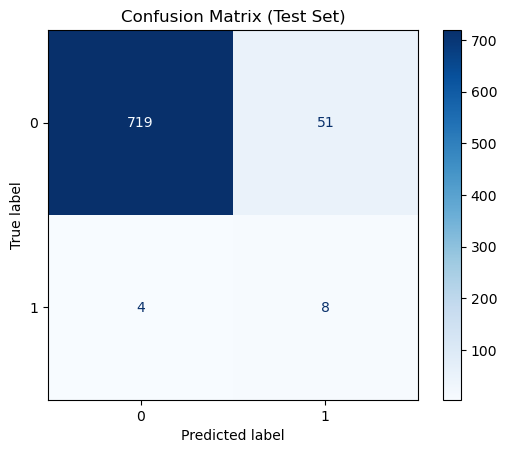

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

df_train = pd.read_csv("Habitable_Train_Balanced.csv")
df_full = pd.read_csv("Habitable_Full_Balanced.csv")
df_test = pd.read_csv("Habitable_Test.csv")
df_val = pd.read_csv("Habitable_Val.csv")

X_train_full = df_full.drop(columns=['Habitable'])
y_train_full = df_full['Habitable']
X_test = df_test.drop(columns=['Habitable'])
y_test = df_test['Habitable']

scaler = StandardScaler()
X_train_full_scaled = scaler.fit_transform(X_train_full)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000)

model.fit(X_train_full_scaled, y_train_full)

y_pred_test = model.predict(X_test_scaled)
y_pred_prob_test = model.predict_proba(X_test_scaled)[:, 1]

accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test, average='weighted')
recall_test = recall_score(y_test, y_pred_test, average='weighted')
f1_test = f1_score(y_test, y_pred_test, average='weighted')

# Generate confusion matrix for the test set
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
ConfusionMatrixDisplay(conf_matrix_test).plot(cmap='Blues')
plt.title('Confusion Matrix (Test Set)')
plt.show()
